# K-nearest neighbors classification

In [45]:
from __future__ import print_function

import numpy as np
from sklearn import datasets, neighbors, linear_model, tree
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris, fetch_olivetti_faces
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from time import time

### Prepare data 

In [46]:
iris = load_iris()
X = iris.data[:,:2] #Choosing only the first two input-features
Y = iris.target

number_of_samples = len(Y)
'''
#Splitting into training and test sets
random_indices = np.random.permutation(number_of_samples)
#Training set
num_training_samples = int(number_of_samples*0.75)
x_train = X[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]
#Test set
x_test = X[random_indices[num_training_samples:]]
y_test = Y[random_indices[num_training_samples:]]
'''
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=number_of_samples)

In [47]:
#Visualizing the training data
X_class0 = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i]==0]) #Picking only the first two classes
Y_class0 = np.zeros((X_class0.shape[0]),dtype=np.int)
X_class1 = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i]==1])
Y_class1 = np.ones((X_class1.shape[0]),dtype=np.int)
X_class2 = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i]==2])
Y_class2 = np.full((X_class2.shape[0]),fill_value=2,dtype=np.int)
for i in range(len(x_train)):
    print(x_train[i],y_train[i])

[4.8 3.1] 0
[5.2 3.5] 0
[4.6 3.2] 0
[4.5 2.3] 0
[5.5 2.6] 1
[5.5 4.2] 0
[6.7 3. ] 2
[5.7 2.6] 1
[5.  3.5] 0
[5.4 3.4] 0
[4.9 3.1] 0
[4.8 3.4] 0
[6.3 3.4] 2
[5.7 2.5] 2
[5.2 4.1] 0
[6.  2.2] 2
[6.  2.9] 1
[7.2 3.2] 2
[4.6 3.1] 0
[5.7 2.9] 1
[5.8 2.7] 1
[6.7 3.1] 1
[4.6 3.4] 0
[7.7 2.6] 2
[6.4 2.7] 2
[6.8 3.2] 2
[5.6 2.5] 1
[7.2 3. ] 2
[6.7 3.1] 2
[6.  2.2] 1
[5.7 2.8] 1
[6.7 3.1] 1
[6.2 2.9] 1
[5.1 3.4] 0
[5.1 2.5] 1
[4.9 2.4] 1
[6.1 2.8] 1
[6.4 3.2] 1
[6.7 3. ] 1
[5.9 3. ] 2
[5.6 2.7] 1
[4.7 3.2] 0
[6.9 3.2] 2
[6.3 3.3] 1
[5.  3.6] 0
[4.9 3.1] 0
[4.9 3.6] 0
[4.9 3. ] 0
[5.1 3.8] 0
[4.9 2.5] 2
[6.2 3.4] 2
[4.6 3.6] 0
[7.1 3. ] 2
[5.6 3. ] 1
[5.7 3.8] 0
[4.8 3.4] 0
[6.6 2.9] 1
[5.5 2.5] 1
[5.9 3. ] 1
[6.4 3.2] 2
[6.4 2.8] 2
[5.1 3.5] 0
[5.4 3.9] 0
[5.4 3.7] 0
[6.3 2.8] 2
[5.9 3.2] 1
[6.8 3. ] 2
[6.3 2.5] 2
[6.2 2.8] 2
[7.3 2.9] 2
[5.5 2.4] 1
[6.3 2.7] 2
[5.1 3.8] 0
[6.5 3. ] 2
[7.7 2.8] 2
[6.6 3. ] 1
[5.7 4.4] 0
[6.2 2.2] 1
[5.7 3. ] 1
[5.  3.4] 0
[4.8 3. ] 0
[6.1 3. ] 2
[5.7 2.8] 1
[6.3

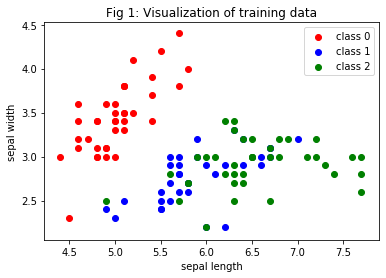

In [48]:
plt.scatter(X_class0[:,0], X_class0[:,1],color='red')
plt.scatter(X_class1[:,0], X_class1[:,1],color='blue')
plt.scatter(X_class2[:,0], X_class2[:,1],color='green')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1','class 2'])
plt.title('Fig 1: Visualization of training data')
plt.show()

In [50]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5) # K = 5
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [51]:
query_point = np.array([5.5,2.8])
true_class_of_query_point = 1
predicted_class_for_query_point = model.predict([query_point])
print("Query point: {}".format(query_point))
print("True class of query point: {}".format(true_class_of_query_point))

Query point: [5.5 2.8]
True class of query point: 1


Visualize the point and its K=5 nearest neighbors.

The query point is: [5.5 2.8]

The nearest neighbors of the query point are:
 [[5.6 2.8]
 [5.6 2.7]
 [5.6 2.9]
 [5.5 2.6]
 [5.7 2.8]]

The classes of the nearest neighbors are: [2 1 1 1 1]

Predicted class for query point: 1


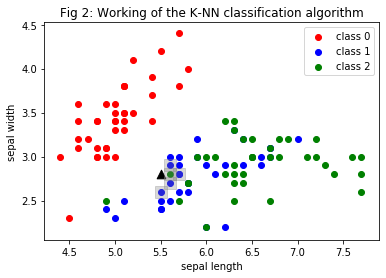

In [53]:
neighbors_object = neighbors.NearestNeighbors(n_neighbors=5)
neighbors_object.fit(x_train)
distances_of_nearest_neighbors, indices_of_nearest_neighbors_of_query_point = neighbors_object.kneighbors([query_point])
nearest_neighbors_of_query_point = x_train[indices_of_nearest_neighbors_of_query_point[0]]
print("The query point is: {}\n".format(query_point))
print("The nearest neighbors of the query point are:\n {}\n".format(nearest_neighbors_of_query_point))
print("The classes of the nearest neighbors are: {}\n".format(y_train[indices_of_nearest_neighbors_of_query_point[0]]))
print("Predicted class for query point: {}".format(predicted_class_for_query_point[0]))

plt.scatter(X_class0[:,0], X_class0[:,1],color='red')
plt.scatter(X_class1[:,0], X_class1[:,1],color='blue')
plt.scatter(X_class2[:,0], X_class2[:,1],color='green')
plt.scatter(query_point[0], query_point[1],marker='^',s=75,color='black')
plt.scatter(nearest_neighbors_of_query_point[:,0], nearest_neighbors_of_query_point[:,1],marker='s',s=150,color='Grey',alpha=0.30)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1','class 2'])
plt.title('Fig 2: Working of the K-NN classification algorithm')
plt.show()

Notice that points in grey are 5 nearest points to the given point (5.5, 2.8).

In [56]:
def evaluate_performance(model, x_test, y_test):
    test_set_predictions = [model.predict(x_test[i].reshape((1,len(x_test[i]))))[0] for i in range(x_test.shape[0])]
    test_misclassification_percentage = 0
    for i in range(len(test_set_predictions)):
        if test_set_predictions[i]!=y_test[i]:
            test_misclassification_percentage+=1
    test_misclassification_percentage *= 100/len(y_test)
    return test_misclassification_percentage

In [57]:
#Evaluate the performances on the validation and test sets
print("Evaluating K-NN classifier:")
test_err = evaluate_performance(model, x_test, y_test)
print('test misclassification percentage = {}%'.format(test_err))

Evaluating K-NN classifier:
test misclassification percentage = 18.42105263157895%
